## Задача Коши для ОДУ высших порядков

### Теория

#### ОДУ n-го порядка

Обыкновенное дифференциальное уравнение n-го порядка:

\begin{align}
y^{(n)}=f(x, y, y', y'', ...,y^{(n-1)})
\end{align}

Начальные условия:

\begin{align}
& y(x_0) = y_0^{(0)} \\
& y'(x_0) = y_0^{(1)} \\
& ... \\
& y^{(n-1)}(x_0) = y_0^{(n-1)} \\
\end{align}

#### Векторная форма ОДУ n-го порядка 

Сделаем замену:

\begin{align}
& u_1(x) = y(x) \\
& u_2(x) = u_1'(x) = y'(x) \\
& ... \\
& u_n(x) = u_{n-1}'(x) = y^{(n-1)}(x) \\
\end{align}

Введем вектор:

\begin{align}
    \overrightarrow{u}(x) &= \begin{bmatrix}
           u_{1}(x) \\
           u_{2}(x) \\
           \vdots \\
           u_{n}(x)
         \end{bmatrix} = \begin{bmatrix}
           y(x) \\
           y'(x) \\
           \vdots \\
           y^{(n-1)}(x)
         \end{bmatrix}
\end{align}

Тогда начальные условия примут вид:

\begin{align}
    \overrightarrow{u_0} = \overrightarrow{u}(x_0) &= \begin{bmatrix}
           y_0^{(0)} \\
           y_0^{(1)} \\
           \vdots \\
           y_0^{(n-1)}
         \end{bmatrix}
\end{align}

Исходное уравнение можно записать в виде системы:

\begin{align}
& u_1' = u_2 \\
& ... \\
& u_i' = u_{i+1} \\
& ... \\
& u_{n-1}' = u_{n} \\
& u_n' = f(x, \overrightarrow{u}) \\
\end{align}

Или в векторной форме:

\begin{align}
\overrightarrow{u}'=\overrightarrow{F}(x, \overrightarrow{u})
\end{align}

Тогда задача Коши в векторной форме примет вид:

\begin{align}
& \overrightarrow{u}'=\overrightarrow{F}(x, \overrightarrow{u}) \\
& \overrightarrow{u}(x_0)=\overrightarrow{u_0}, \\
\end{align}

где


\begin{align}
    \overrightarrow{F}(x, \overrightarrow{u}) &= \begin{bmatrix}
           u_{2}(x) \\
           u_{3}(x) \\
           \vdots \\
           u_{n}(x) \\
           f(x, \overrightarrow{u})
         \end{bmatrix}
\end{align}

### Задание

Реализуйте численный метод решения задачи Коши для ОДУ произвольного порядка в сооответствии с вариантом:
1. Метод Рунге-Кутта 4-го порядка
2. Модифицированный метод Эйлера
3. Метод Эйлера с пересчетом

Метод должен быть реализован в виде функции с сигнатурой `cauchy(f, u0, x0, xn, h)`, где:
* `f` - функция от двух переменных `x` (число) и `u` (массив), соответсвующая правой части ОДУ: $y^{(n)}=f(x, y, y', y'', ...,y^{(n-1)})$ 
* `u0` - массив начальных условий: $\overrightarrow{u}(x_0)=\overrightarrow{u_0}$
* `x0` и `xn` - начало и конец отрезка разбиения
* `h` - шаг разбиения

Метод должен возвращать набор точек интегральной кривой в узлах разбиения

**Моя функция:**

In [ ]:
import math
import numpy as np

f = lambda x, u: u[-1] + u[-2] + u[-3] * x

x0 = 0
xn = 15
u0 = [0, 0, 2]
h = 0.01


3. Метод Эйлера с пересчетом:


In [ ]:
def cauchy(f, u0, x0, xn, h):
    func = lambda x, u: np.append(u[1:], f(x, u))
    x = x0
    u = np.array(u0)
    res = [(x, u[0])]
    while x + h <= xn:
        u = u + h * func(x, u)
        x += h
        res.append((x, u[0]))
    res = np.array(res)
    return np.linspace(x0, xn, int((xn-x0)/h)+1), res[:,1]

x, y = cauchy(f, u0, x0, xn, h)

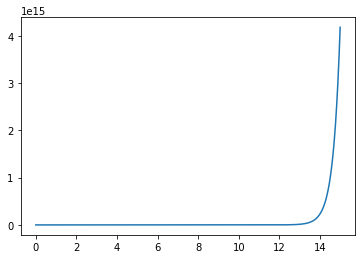

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.show()

Используйте функцию `cauchy` для решения задачи Коши для ОДУ 3-го порядка (придумайте самостоятельно). Используйте шаг разбиения `h = 0.01`. Отрисуйте полученную интегральную кривую